In [1]:
from methods.face_det_init_cnn import create_mtcnn
import mmcv
import cv2
from methods.constants import IMG_WIDTH, IMG_HEIGHT
mtcnn = create_mtcnn(device='cuda')


420 42


In [5]:
img = open("../tests/influencer2.png", "rb").read()
image = mmcv.imfrombytes(img)
W_new, H_new = IMG_WIDTH, IMG_HEIGHT
image = cv2.resize(image, (W_new, H_new), interpolation=cv2.INTER_LINEAR)
print(image.shape)
imgs = [image for _ in range(1000)]

(315, 420, 3)


In [6]:
lst = 0
for i in range(1):
    
    import time
    tic = time.time()
    print(len(imgs), imgs[0].shape)
    boxes_list, confidence_list =mtcnn.detect(imgs)
    toc = time.time()
    lst = toc - tic
    results = []
    for boxes in boxes_list:
        result = []
        results.append(result)
        if boxes is None:
            continue
        for box in boxes:
            result.append([int(round(i)) for i in box])
    print(f"Experiment with {1<<i} images => batch inference time = {lst}")
    
    #print(toc - tic > 2 * lst)
import numpy as np
np.array(results).shape

1000 (315, 420, 3)
Experiment with 1 images => batch inference time = 2.850432872772217


(1000, 1, 4)

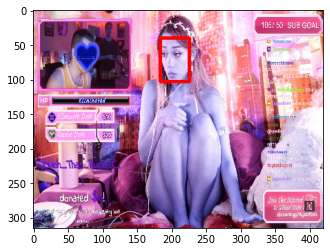

In [7]:
from streamer import detect_faces
import matplotlib.pyplot as plt


arr = detect_faces(image.copy(), mtcnn)
plt.imshow(arr)


# Check model logs

In [5]:
import re
path = "/home/jafar/PyCharmProjects/Upwork/Andrei-Torchserve/torchserve/logs"

import os

pth = os.path.join(path, "model_metrics.log")

logs = open(pth, "r").read()
pth = os.path.join(path, "model_log.log")

logs = logs + "\n" +  open(pth, "r").read()
keywords = [
    # "PreprocessingTimeForBatch", 
    "BatchSize", 
    # "InferenceTimeForBatch", 
    "HandlerTime",
     "InternalInferenceTimeForBatch"
    ]
for keyword in keywords:
    pattern = f'{keyword}.\w+.\w+:(\d+.?\d*)'
    matches = re.findall(pattern, logs)
    matches = list(map(lambda x: float(x), matches))
    #print(matches)
    import numpy
    arr = numpy.array(matches)
    print(pattern.split(".")[0], arr.min(), arr.max(), arr.mean(), arr.std())

#!rm /home/jafar/PyCharmProjects/Upwork/Andrei-Torchserve/torchserve/logs -r

BatchSize 2.0 32.0 30.928571428571427 5.567306167185677
HandlerTime 26.88 418.0 320.4428571428571 73.99739309390486
InternalInferenceTimeForBatch 16.748666763305664 319.52381134033203 222.39805970873152 60.26972393174802


# Check coordinator on jupyter

In [1]:
import unittest
import time
from coordinator import MMdetHandler
class Test_Coordinator(unittest.TestCase):
    def __init__(self, methodName="coordinator"):

        class Metrics:
            def add_time(self, *args, **kwargs):
                self.log(*args, **kwargs)
            def add_metric(self, *args, **kwargs):
                self.log(*args, **kwargs)
            def log(self, *args, **kwargs):
                print("Logger.args= ", *args)
                print("Logger.kwargs= ", *args)    

        class Context:
            system_properties = {
                "gpu_id" : "0"
            }

            metrics = Metrics()
            def get_request_header(self, *args, **kwargs):
                return True


        #super().__init__(methodName)
        self.model_handler = MMdetHandler()
        self.model_handler.initialize(context=Context())
        self.handle = self.model_handler.handle
        self.context = Context()

    def test_batch(self, batch_sz=128, img_path = "../tests/influencer.png"):
        img_binary = open(img_path, "rb").read()
        json_req = {"body" : img_binary}
        batch = [json_req for _ in range(batch_sz)]
        print("Initializing")
        def handle_once():
            tic = time.time()
            res = self.handle(batch, self.context)
            print(res)
            toc = time.time()
            print("HandleTime", toc - tic)
        for _ in range(1):
            handle_once()
tst = Test_Coordinator()

STUFF IN THE DIRECTORY
420 42


In [2]:
tst.test_batch()

Initializing
Logger.args=  BatchSize 128 e92ab461-328c-4b4c-96e9-835be6250a8d Batches
Logger.kwargs=  BatchSize 128 e92ab461-328c-4b4c-96e9-835be6250a8d Batches
Logger.args=  PackageSize 3 KB 90d5a3b2-d185-4a58-8ce4-8ebfa3637fb3
Logger.kwargs=  PackageSize 3 KB 90d5a3b2-d185-4a58-8ce4-8ebfa3637fb3
Logger.args=  PackageSize 3 KB cc94c6ca-0141-4719-aed2-cff511fcf58b
Logger.kwargs=  PackageSize 3 KB cc94c6ca-0141-4719-aed2-cff511fcf58b
Logger.args=  PackageSize 3 KB 84566f8b-5f74-4aff-bbd3-a2f1205870f0
Logger.kwargs=  PackageSize 3 KB 84566f8b-5f74-4aff-bbd3-a2f1205870f0
Logger.args=  PackageSize 3 KB b4133604-c1c2-4959-b423-adb17d824065
Logger.kwargs=  PackageSize 3 KB b4133604-c1c2-4959-b423-adb17d824065
Logger.args=  PackageSize 3 KB 9712545c-f595-4774-84e3-41d852c7b064
Logger.kwargs=  PackageSize 3 KB 9712545c-f595-4774-84e3-41d852c7b064
Logger.args=  PackageSize 3 KB 60bdb33c-59cf-4b0d-9032-15726fbc6f4a
Logger.kwargs=  PackageSize 3 KB 60bdb33c-59cf-4b0d-9032-15726fbc6f4a
Logger.args

/home/jafar/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
